In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


### 1: Get all files from the folder and merge them into one CSV

In [2]:
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(f"./Sales_Data/{file}")
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("All_data_new.csv",index=False)

In [3]:
all_data = pd.read_csv("all_data.csv")

In [4]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


In [6]:
all_data.describe()

,Order ID,Quantity Ordered,Price Each
count,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735
std,51512.737110,0.442793,332.731330
min,141234.000000,1.000000,2.990000
25%,185831.250000,1.000000,11.950000
50%,230367.500000,1.000000,14.950000
75%,275035.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


### 2: Clean up the data
### drop rows of null values

In [7]:
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')

all_data.shape


(185950, 6)

#### 3: changing the datatype of price column

In [8]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### 4: Add Month column

In [9]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

C:\Users\gaura\AppData\Local\Temp\ipykernel_22716\3704723626.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 9.2+ MB


### 5: Add sales column

In [11]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### 6: Add a city column

In [12]:
def get_city(address):
    return address.split(",")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


### 7: Find sales for every month

In [13]:
results = all_data.groupby(['Month']).sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
Month,,,,,,,,
1,1421630798,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01-01-2020 00:3801-01-2020 00:2201-01-2020 00:...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73,Dallas New York City New York City San Franci...
2,1871052592,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602-0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42,Portland San Francisco New York City Atlanta ...
3,2564810956,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03-01-2019 03:0603-01-2019 01:0303-01-2019 02:...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38,San Francisco Portland San Francisco San Fran...
4,3387347100,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604-07-2019 22:3004-12-2019 14:38...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24,Dallas Boston Los Angeles Los Angeles Los Ang...
5,3345871523,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05-01-2019 03:2905-01-2019 00:1305-01-2019 00:...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75,Portland San Francisco Boston Boston San Fran...
6,2932976072,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806-0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26,Portland San Francisco Los Angeles Seattle Sa...
7,3284139576,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107-05-2019 08:5507/29/19 12:4107...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76,Atlanta Seattle Atlanta Atlanta Seattle San F...
8,2899373917,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108-06-2019 14:4008...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88,Seattle Dallas Portland Los Angeles New York ...
9,2948726831,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09-01-2019 04:1309-01-2019 01:0909-01-2019 02:...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13,San Francisco San Francisco Seattle San Franc...


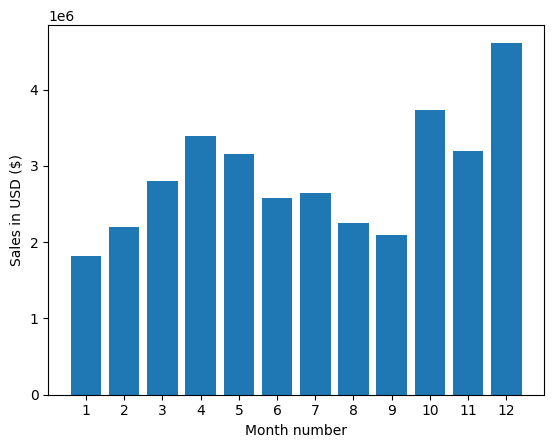

In [14]:
months= range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### 8: which city had the highest number of sales?

In [15]:
results = all_data.groupby(['City']).sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta,3423838407,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04-12-2019 10:5804/19/19 14:2904/27/19 12:2004...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin,2280982185,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104-11-2019 16:5904/20/19 20:5304...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston,4598265261,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04-07-2019 22:3004-08-2019 14:0504-09-2019 23:...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas,3415643578,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904-0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles,6811084693,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04-12-2019 14:3804-12-2019 14:3804/30/19 09:27...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City,5736333884,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04-04-2019 20:3004/27/19 00:3004-11-2019 10:23...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland,2868861092,AAA Batteries (4-pack)Lightning Charging Cable...,14053,2307747.47,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",87765,2320490.61
San Francisco,10304443952,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91
Seattle,3406693974,Bose SoundSport HeadphonesLightning Charging C...,16553,2733296.01,04-02-2019 07:4604/15/19 12:1804-02-2019 04:00...,"668 Center St, Seattle, WA 98101438 Elm St, Se...",104941,2747755.48


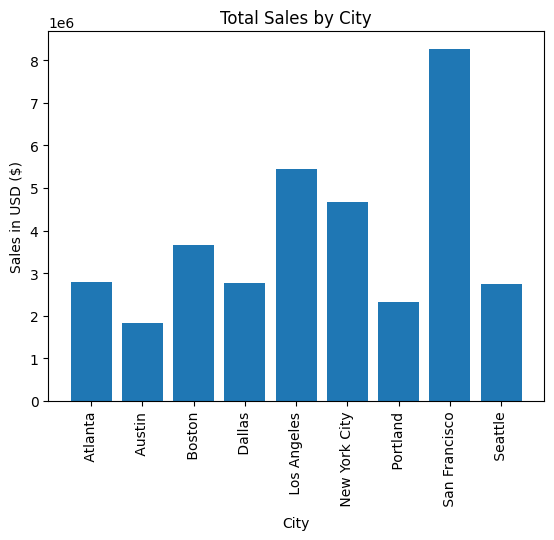

In [16]:
cities = results.index.tolist() 
plt.bar(cities, results['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.title('Total Sales by City')
plt.show()

#### 9: What time should we display advertisements to maximize likelihood of customer's buying product?

In [17]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

C:\Users\gaura\AppData\Local\Temp\ipykernel_22716\3943995571.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
C:\Users\gaura\AppData\Local\Temp\ipykernel_22716\3943995571.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30,1
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38,1
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38,1
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27,1


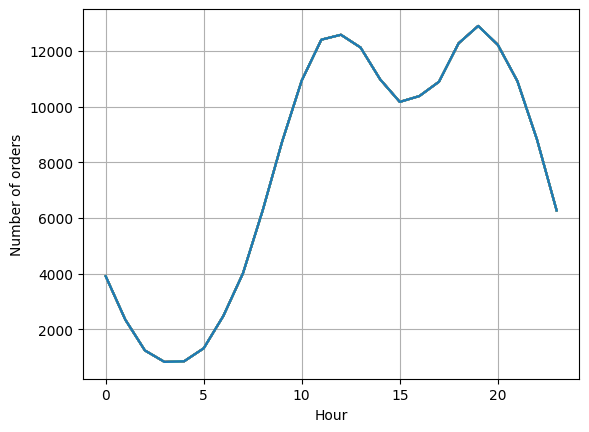

In [18]:
hours = [hours for hours, df in all_data.groupby(['Hour'])]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.ylabel('Number of orders')
plt.xlabel('Hour')
plt.grid()
plt.show()
plt.show()

#### 10: What products are most often sold together?

In [19]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(10)

C:\Users\gaura\AppData\Local\Temp\ipykernel_22716\4125320809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
188,176739,"34in Ultrawide Monitor,Google Phone"
224,176774,"Lightning Charging Cable,USB-C Charging Cable"
232,176781,"iPhone,Lightning Charging Cable"


In [20]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### 11: Which product sold the most?

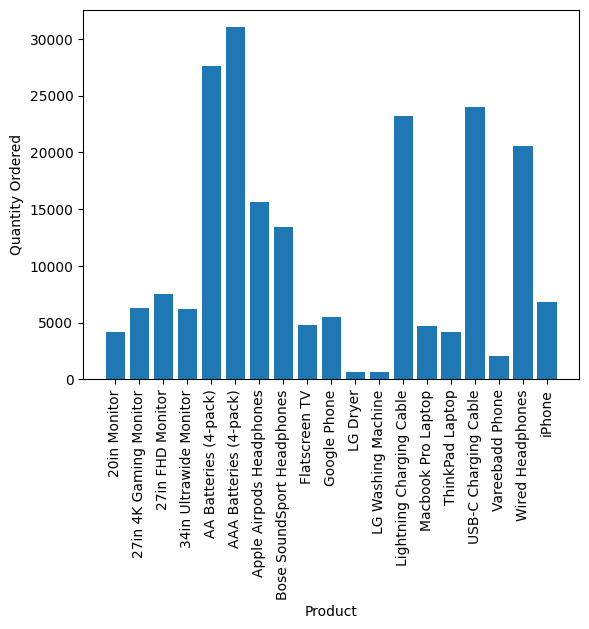

In [21]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation=90)
plt.show()